In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.n_jobs = 6

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
backcall            0.2.0
cairo               1.19.1
cffi                1.14.2
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.33.0+1.g022ab0f
matplotlib          3.3.1
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.0.1
nt                  NA
ntsecuritycon       NA
numba               0.50.1
numexpr             2.7.1
numpy               1.19.1
packaging           20.4
pandas              1.1.1
parso               0.7.0
pickleshare         0.7.5
pkg_resources       N

In [3]:
adata = sc.read_10x_mtx("../../Ileum/", cache=True)
adata

... reading from cache file cache\..-..-Ileum-matrix.h5ad


AnnData object with n_obs × n_vars = 39671 × 33660
    var: 'gene_ids'

In [4]:
obs = pd.read_table("../../Ileum/Effi_tsne_final.txt", header=[0, 1])
obs.columns = [i[0] for i in obs.columns]
obs.index = obs.NAME
adata = adata[obs.NAME, :]
adata.obs = obs
adata.obs

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


,NAME,X,Y,Primary Lineages,kmeans
NAME,,,,,
122_AAACCTGGTTCCCGAG,122_AAACCTGGTTCCCGAG,-17.523981,25.760201,IgA plasma cells,5
122_AAAGATGTCAGCTCTC,122_AAAGATGTCAGCTCTC,-4.299636,-1.107461,Tregs,2
122_AAAGCAACAAGAAGAG,122_AAAGCAACAAGAAGAG,18.438143,-1.855235,Mast cells,17
122_AAATGCCTCACCCGAG,122_AAATGCCTCACCCGAG,8.266746,4.860057,TRM,3
122_AACCATGCATCACCCT,122_AACCATGCATCACCCT,1.359606,36.710104,IgA plasma cells,10
...,...,...,...,...,...
209_TTTGTCAGTCTCTTAT,209_TTTGTCAGTCTCTTAT,11.309222,21.416638,TRM,1
209_TTTGTCAGTGTGGTTT,209_TTTGTCAGTGTGGTTT,23.971407,1.429820,Group3 ILC,13
209_TTTGTCATCAGTTAGC,209_TTTGTCATCAGTTAGC,8.514284,0.595697,TRM,3


In [5]:
adata.obs['batch'] = adata.obs.NAME.str[0:3]

In [6]:
adata = adata[adata.obs['batch'] == '193', ]

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Primary Lineages' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch' as categorical


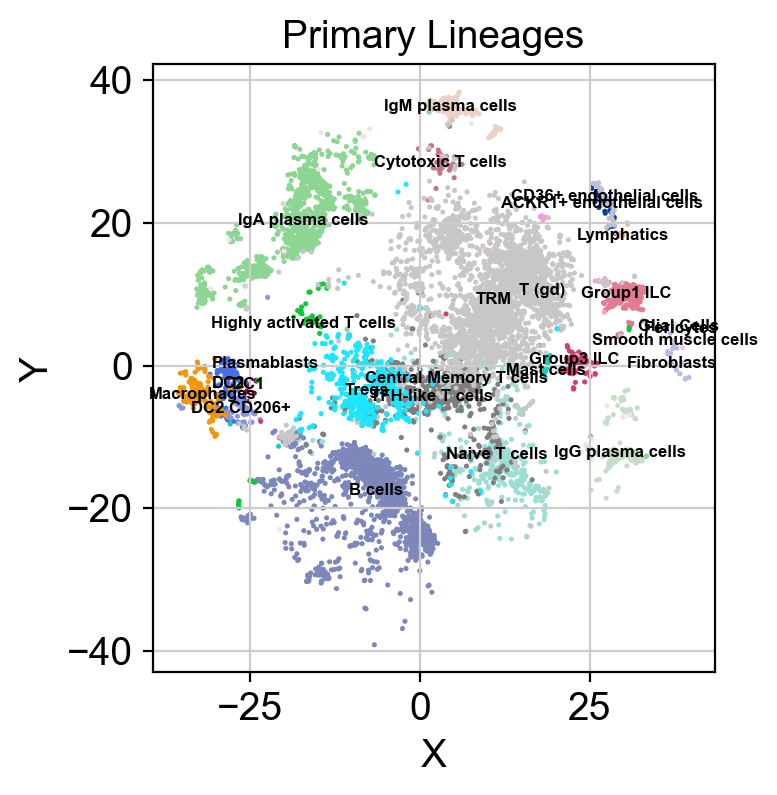

In [7]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.scatter(adata, "X", "Y", "Primary Lineages", legend_loc="on data", legend_fontsize=6, frameon=False)

## QC

The dataset is already filtered, so no need to do additional QC.
Nevertheless, we show the figures.

normalizing counts per cell
    finished (0:00:00)


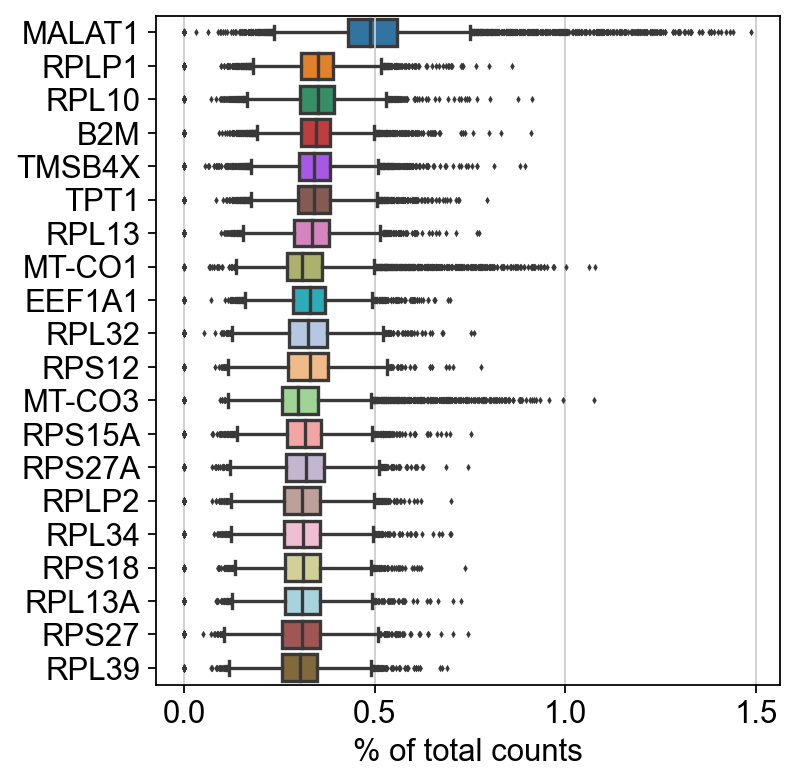

In [8]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


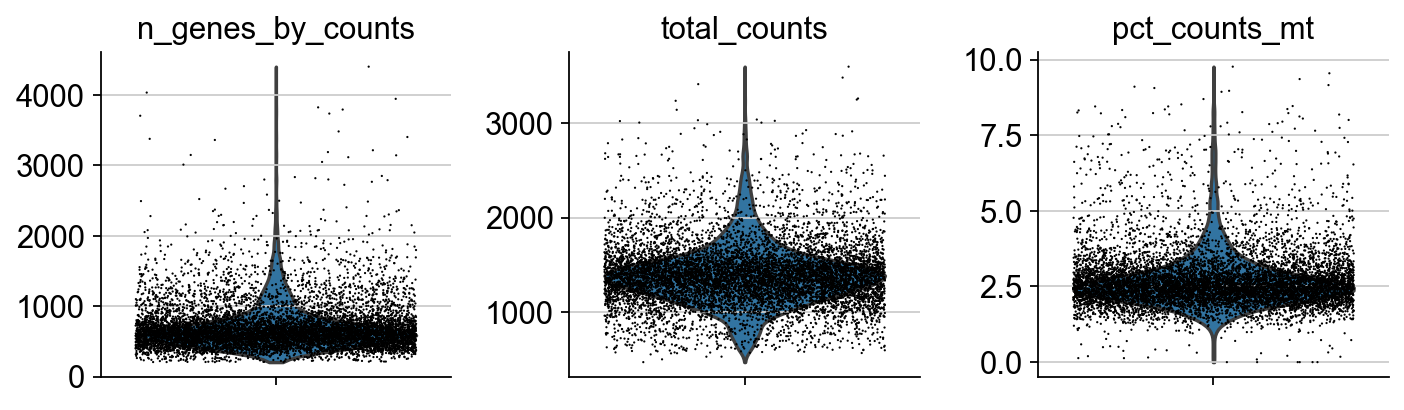

In [9]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


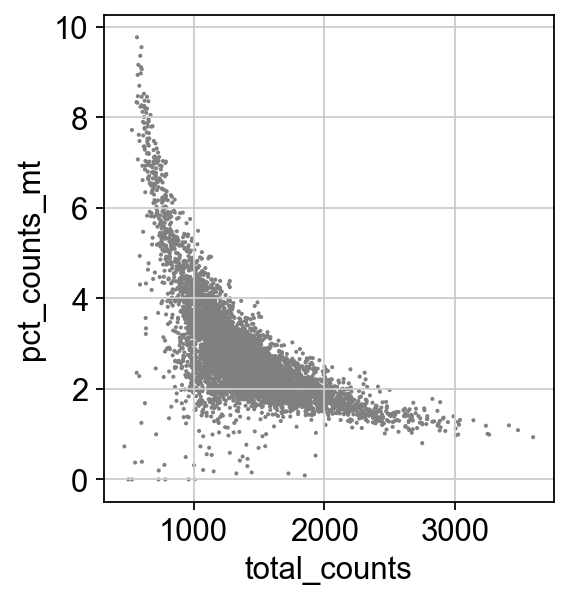

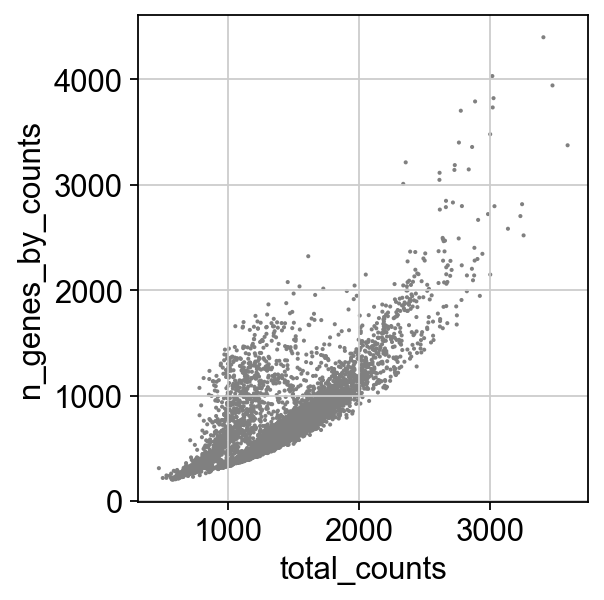

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
adata.raw = adata

In [12]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 15566 genes that are detected in less than 3 cells


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


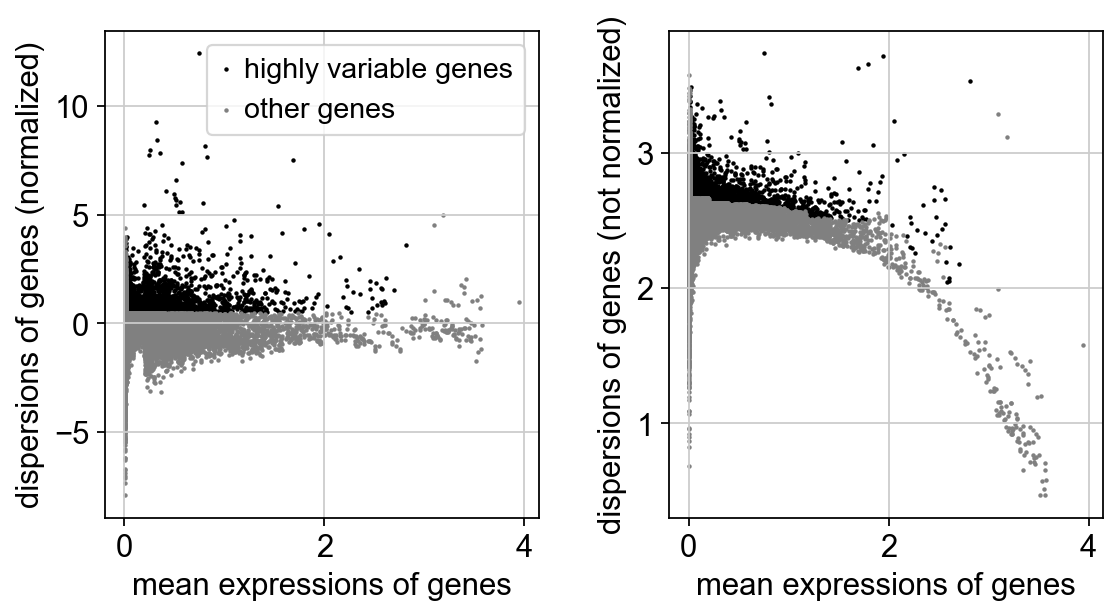

In [14]:
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

In [15]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 8833 × 3564
    obs: 'NAME', 'X', 'Y', 'Primary Lineages', 'kmeans', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Primary Lineages_colors', 'log1p', 'hvg'

In [16]:
#sc.pp.regress_out(adata, ['batch'], n_jobs=1)

In [17]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\scanpy\preprocessing\_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


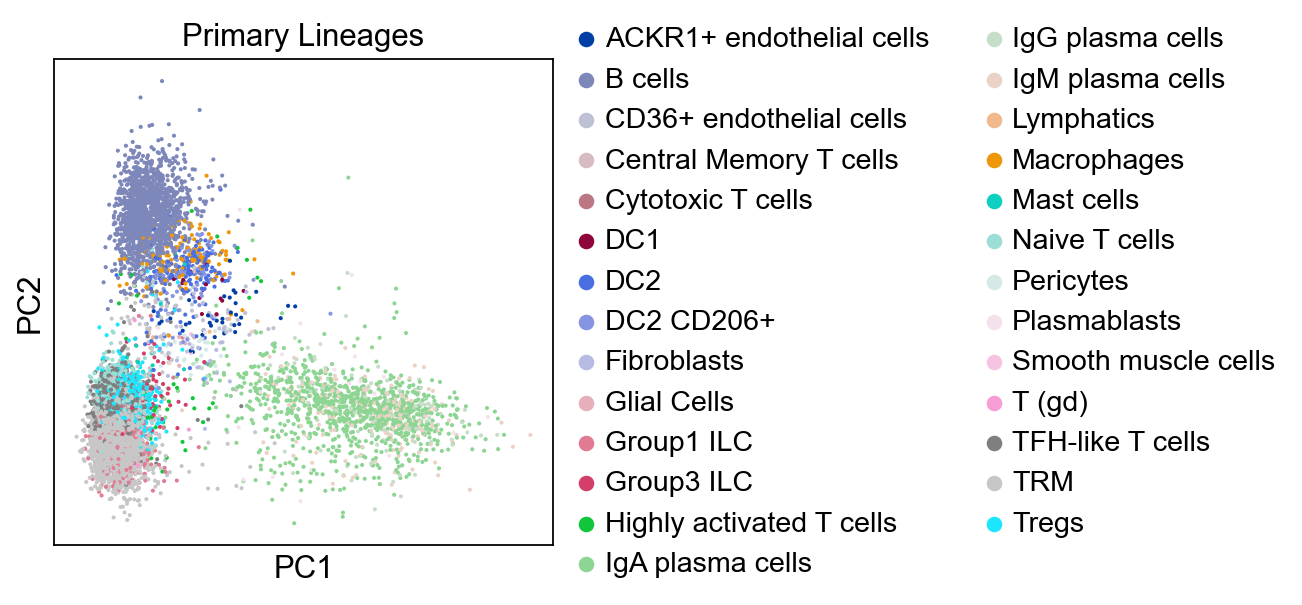

In [18]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color="Primary Lineages")

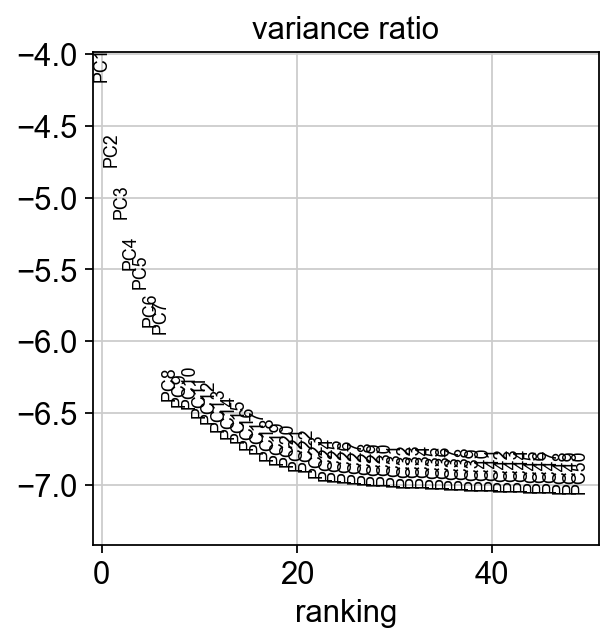

In [19]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [20]:
# sc.tl.rank_genes_groups(adata, 'Primary Lineages', method='wilcoxon')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols=3)

In [21]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


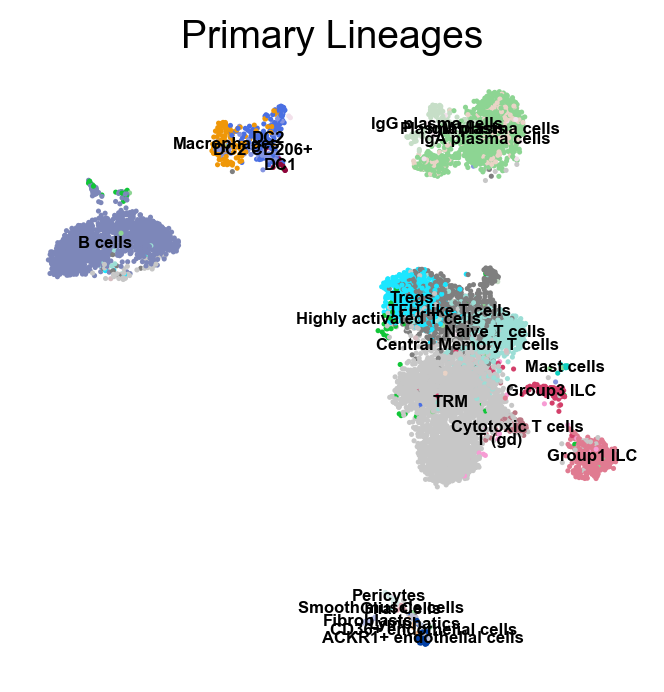

In [22]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color="Primary Lineages", legend_loc="on data", legend_fontsize=6, frameon=False)

In [23]:
#import numpy
#random5000 = numpy.random.choice(range(adata.shape[0]), 5000, False)

In [24]:
#%autoreload
import sys
sys.path.insert(0,'..')
import compactmarker._tsne_l1
model = compactmarker._tsne_l1.TsneL1(n_pcs=20)
model.fit(adata.X)

Calculating distance matrix and scaling factors...
Computing pairwise distances...
Computing P-values for point 0 of 8833...
Computing P-values for point 500 of 8833...
Computing P-values for point 1000 of 8833...
Computing P-values for point 1500 of 8833...
Computing P-values for point 2000 of 8833...
Computing P-values for point 2500 of 8833...
Computing P-values for point 3000 of 8833...
Computing P-values for point 3500 of 8833...
Computing P-values for point 4000 of 8833...
Computing P-values for point 4500 of 8833...
Computing P-values for point 5000 of 8833...
Computing P-values for point 5500 of 8833...
Computing P-values for point 6000 of 8833...
Computing P-values for point 6500 of 8833...
Computing P-values for point 7000 of 8833...
Computing P-values for point 7500 of 8833...
Computing P-values for point 8000 of 8833...
Computing P-values for point 8500 of 8833...
Mean value of sigma: 2.074974
Done. Elapsed time: 209.60 seconds. Total: 209.60 seconds.
Optimizing...
0 loss: 

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


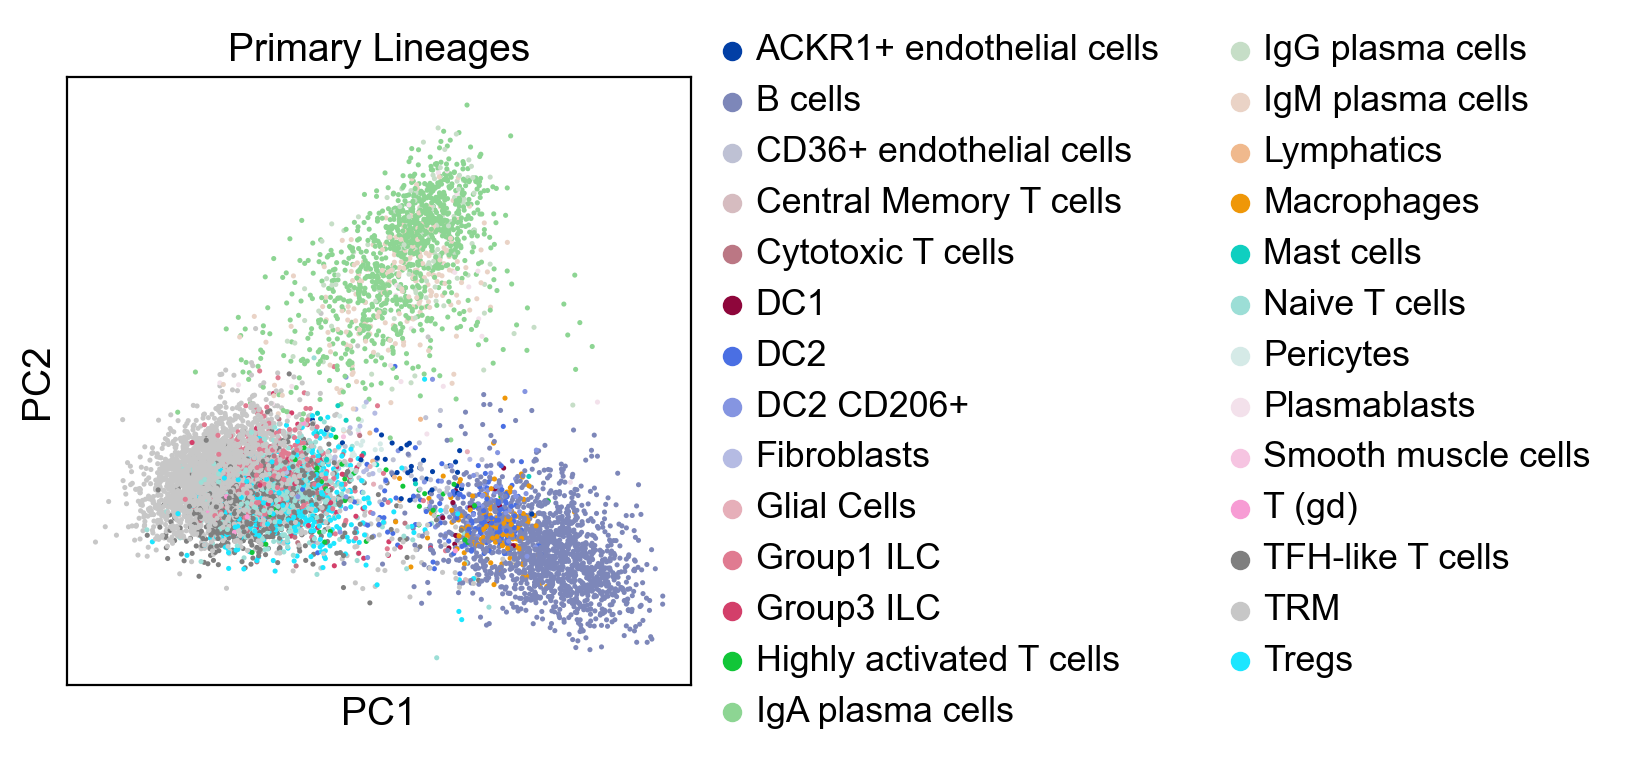

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


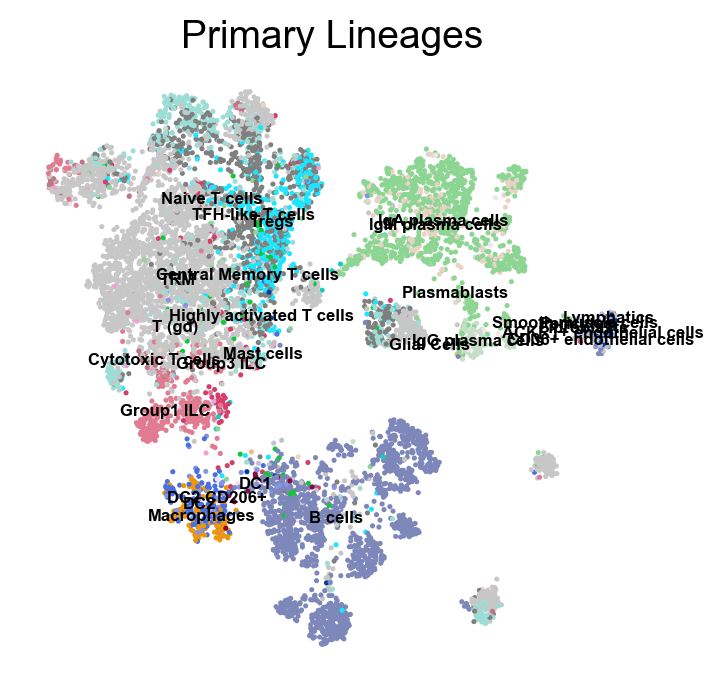

In [25]:
new_adata = model.transform(adata)
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pl.pca(new_adata, color="Primary Lineages")
sc.pp.neighbors(new_adata, n_pcs=20)
sc.tl.umap(new_adata)
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(new_adata, color="Primary Lineages", legend_loc="on data", legend_fontsize=6, frameon=False)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


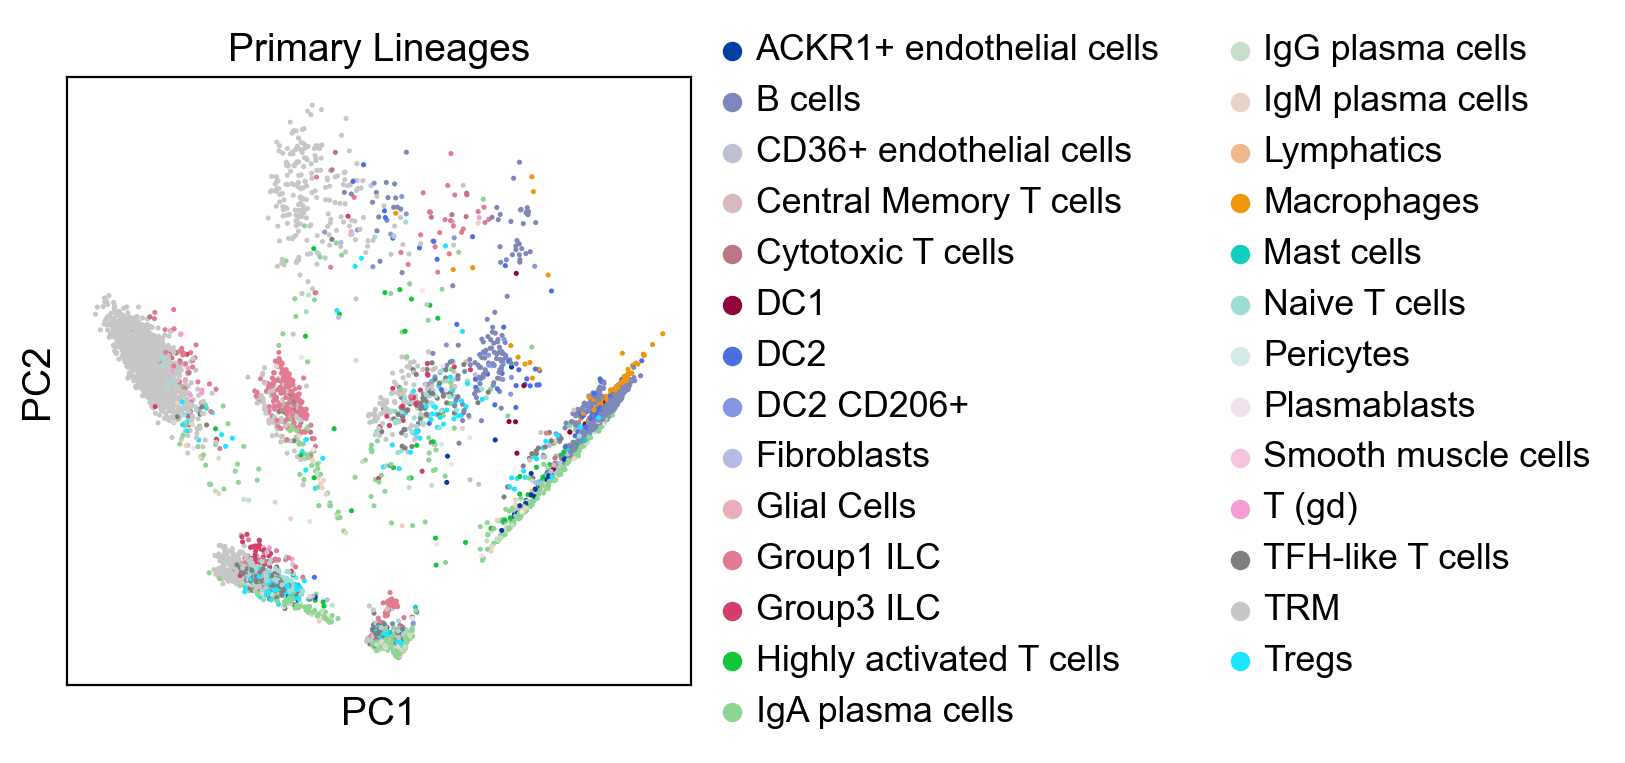

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


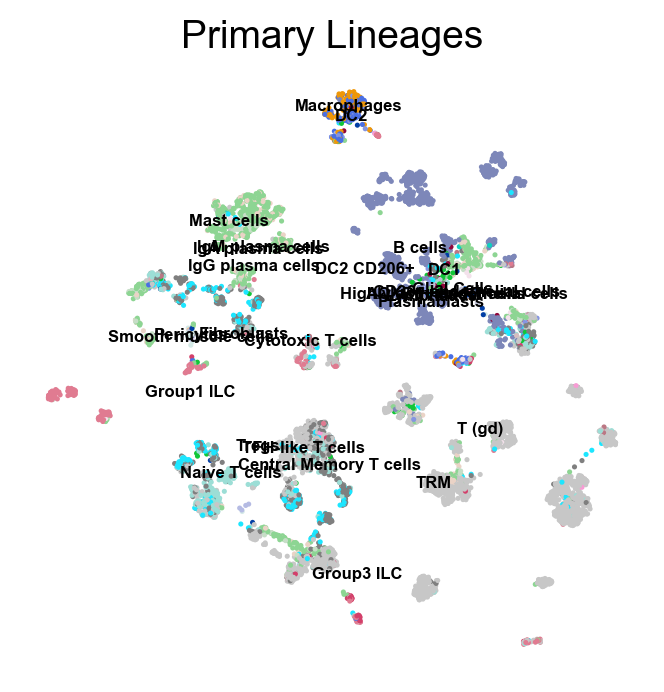

In [26]:
new_adata = model.transform(adata)
new_adata.X = new_adata.X * model.w[model.get_mask()]
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pl.pca(new_adata, color="Primary Lineages")
sc.pp.neighbors(new_adata)
sc.tl.umap(new_adata)
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(new_adata, color="Primary Lineages", legend_loc="on data", legend_fontsize=6, frameon=False)